In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [81]:
url = '/content/drive/MyDrive/ColabData/Iris.csv'
Dataset = pd.read_csv(url)
Dataset = Dataset.sample(frac=1).reset_index(drop=True)
Dataset

,Petal Length,Petal Width,Sepal Length,Sepal Width,Class
0,6.5,3.2,5.1,2.0,Iris-virginica
1,7.7,3.0,6.1,2.3,Iris-virginica
2,6.7,2.5,5.8,1.8,Iris-virginica
3,4.9,2.5,4.5,1.7,Iris-virginica
4,4.7,3.2,1.6,0.2,Iris-setosa
...,...,...,...,...,...
145,6.8,2.8,4.8,1.4,Iris-versicolor
146,7.2,3.0,5.8,1.6,Iris-virginica
147,5.5,2.3,4.0,1.3,Iris-versicolor
148,7.0,3.2,4.7,1.4,Iris-versicolor


In [82]:
inputFeature = (Dataset.iloc[:,:-1])
outputFeature = (Dataset.iloc[:,-1])

print("Shape of Input Feature : ", np.shape(inputFeature))
print("Shape of OutputFeature : ", np.shape(outputFeature))

Shape of Input Feature :  (150, 4)
Shape of OutputFeature :  (150,)


In [83]:
training_X,testing_X, training_Y, testing_Y = train_test_split(inputFeature, outputFeature, test_size=0.2, random_state= 25)
training_X = training_X.reset_index(drop=True)
training_Y = training_Y.reset_index(drop=True)
testing_X = testing_X.reset_index(drop = True)
testing_Y = testing_Y.reset_index(drop = True)

print("Shape of Training_X : ", np.shape(training_X))
print("Shape of Training_Y : ", np.shape(training_Y))
print("Shape of Testing_X : ", np.shape(testing_X))
print("Shape of Testing_Y : ", np.shape(testing_X))

Shape of Training_X :  (120, 4)
Shape of Training_Y :  (120,)
Shape of Testing_X :  (30, 4)
Shape of Testing_Y :  (30, 4)


#USING SKLEARN

In [84]:
def KNN_Using_Sklearn(xtrain, xtest, ytrain, k):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(xtrain, ytrain)
  return neigh.predict(xtest)

def KFold_Using_Sklearn(inputFeature, outputFeature, k):
  acclist = list()
  kf = KFold(n_splits=5, random_state=None, shuffle=False)
  for train_index, test_index in kf.split(inputFeature):
    X_train, X_test = inputFeature.iloc[train_index], inputFeature.iloc[test_index]
    y_train, y_test = outputFeature.iloc[train_index], outputFeature.iloc[test_index]
    confMatrix = confusion_matrix(y_test , KNN_Using_Sklearn(X_train, X_test,y_train, k))
    acclist.append(np.round((((confMatrix[0,0] + confMatrix[1,1] + confMatrix[2,2])/np.sum(confMatrix)) * 100), 2))

  return np.average(acclist)

[96.0, 96.0, 96.668, 96.00200000000001, 96.00200000000001, 96.00200000000001, 96.00200000000001, 96.668, 97.334, 96.00200000000001, 92.668, 94.0, 94.00200000000001, 95.334, 95.334, 94.0, 95.334, 95.334, 96.0, 96.0, 94.666, 94.0]


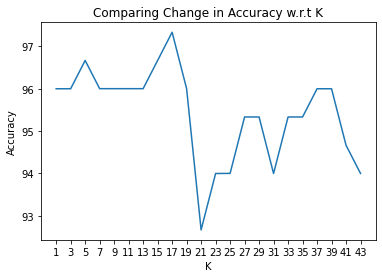

In [85]:
Klist = list(range(1,45,2))
K_accuracy = list()
for K in Klist:
  K_accuracy.append(KFold_Using_Sklearn(inputFeature,outputFeature, K))

print(K_accuracy)
plt.plot([str(x) for x in Klist], K_accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Comparing Change in Accuracy w.r.t K')
plt.show()

In [86]:
K=Klist[np.argmax(K_accuracy)] #best K
K

17

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.83      1.00      0.91         5

       accuracy                           0.97        30
      macro avg       0.94      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30



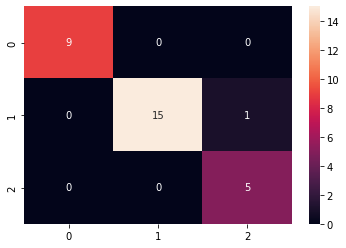

In [87]:
pridiction = KNN_Using_Sklearn(training_X, testing_X, training_Y, K)
confMatrix = confusion_matrix(testing_Y, pridiction)
sns.heatmap(confMatrix, annot=True)
print(classification_report(testing_Y, pridiction))

#Manually Doing KNN

In [88]:
def Euclidean_Distance(inputData, query):
  return (np.sqrt(np.sum(((inputData - query)**2), 1))).to_numpy()

def KNN_Pridiction(trainX, trainY, testX, testY, K):
  result_Y = list()
  for i in range(len(testY)):
    sorted_Index = Euclidean_Distance(trainX, testX.iloc[i]).argpartition(K)
    unique_Values, counts = np.unique((trainY.iloc[sorted_Index[(range(K))]].to_numpy()), return_counts = True)
    result_Y.append(unique_Values[np.argmax(counts)])
  return result_Y

In [89]:
def KFold(dataset, K):
  KFold_Value = 5
  InstancesIn_Fold = len(Dataset)//KFold_Value

  Fold1 = dataset.iloc[:InstancesIn_Fold, :].reset_index(drop=True)
  Fold2 = dataset.iloc[InstancesIn_Fold : InstancesIn_Fold*2 , :].reset_index(drop=True)
  Fold3 = dataset.iloc[InstancesIn_Fold*2 : InstancesIn_Fold*3 , :].reset_index(drop=True)
  Fold4 = dataset.iloc[InstancesIn_Fold*3 : InstancesIn_Fold*4 , :].reset_index(drop=True)
  Fold5 = dataset.iloc[InstancesIn_Fold*4 : InstancesIn_Fold*5, :].reset_index(drop=True)

  Fold_List = [Fold1, Fold2, Fold3, Fold4, Fold5]
  acclist = list()

  for c in range(KFold_Value):
    TrainingData = pd.concat([x for x in Fold_List if True in (np.where(x != Fold_List[c], True, False))])
    TrainingData = TrainingData.reset_index(drop=True)
    TestingData = Fold_List[c]
    Conf_matrix = confusion_matrix(TestingData.iloc[:,-1], KNN_Pridiction(TrainingData.iloc[:,:-1], TrainingData.iloc[:,-1], TestingData.iloc[:,:-1], TestingData.iloc[:,-1], K))
    acclist.append(np.round(((Conf_matrix[0,0] + Conf_matrix[1,1] + Conf_matrix[2,2])/(np.sum(Conf_matrix)) * 100),2))
 
  return np.average(acclist)

[96.0, 96.0, 96.668, 96.00200000000001, 96.00200000000001, 96.00200000000001, 96.00200000000001, 96.668, 97.334, 96.00200000000001, 92.668, 94.0, 94.00200000000001, 95.334, 95.334, 94.0, 95.334, 95.334, 96.0, 96.0, 94.666, 94.0, 92.66399999999999]


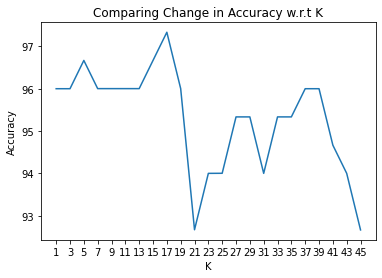

In [90]:
Klist = list(range(1,46,2))
K_accuracy = list()
for K in Klist:
  # predicted_Y = KNN_Pridiction(training_X, training_Y, testing_X, testing_Y, K)
  K_accuracy.append(KFold(Dataset, K))
  # matrix = Confusion_Matrix(testing_Y, predicted_Y)
  # K_accuracy.append(np.round((((matrix[0,0)] + matrix[1,1])/np.sum(matrix)) * 100), 2))

print(K_accuracy)
plt.plot([str(x) for x in Klist], K_accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Comparing Change in Accuracy w.r.t K')
plt.show()

In [91]:
K=Klist[np.argmax(K_accuracy)] #best K
predicted_Y = KNN_Pridiction(training_X, training_Y, testing_X, testing_Y, K)

When K = 17:
Accuracy :96.67

*****For Class 0*****
True Positive : 9
False Positive : 0
True Negative : 20
False Negative : 1
Recall : 0.9
Pricision : 1.0
F1score : 0.9473684210526316

*****For Class 1*****
True Positive : 15
False Positive : 1
True Negative : 14
False Negative : 1
Recall : 0.9375
Pricision : 0.9375
F1score : 0.9375

*****For Class 2*****
True Positive : 5
False Positive : 0
True Negative : 24
False Negative : 1
Recall : 0.8333333333333334
Pricision : 1.0
F1score : 0.9090909090909091


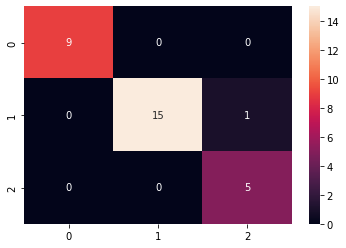

In [92]:
matrix = confusion_matrix(testing_Y, np.array(predicted_Y))
sns.heatmap(matrix, annot=True)
Accuracy = (np.round((((matrix[0,0] + matrix[1,1] + matrix[2,2])/np.sum(matrix)) * 100), 2))

print(f"=========================\nWhen K = {K}:\nAccuracy :{Accuracy}")
print(f"\n*****For Class 0*****")
tp0 = matrix[0,0]
fp0 = matrix[0,1] + matrix[0,2]
tn0 = matrix[1,1] + matrix[2,2]
fn0 = matrix[1,0] + matrix[2,0] + matrix[1,2] + matrix[2,1]
print(f"True Positive : {tp0}")
print(f"False Positive : {fp0}")
print(f"True Negative : {tn0}")
print(f"False Negative : {fn0}")
recall0 = tp0/(fn0+tp0)
pricision0 = tp0/(fp0+tp0)
f1score0 = (2*recall0*pricision0)/(pricision0+recall0)
print(f"Recall : {recall0}")
print(f"Pricision : {pricision0}")
print(f"F1score : {f1score0}")

print(f"\n*****For Class 1*****")
tp1 = matrix[1,1]
fp1 = matrix[1,0] + matrix[1,2]
tn1 = matrix[0,0] + matrix[2,2]
fn1 =matrix[0,1] + matrix[0,2]+matrix[1,0]+matrix[1,2]
print(f"True Positive : {tp1}")
print(f"False Positive : {fp1}")
print(f"True Negative : {tn1}")
print(f"False Negative : {fn1}")
recall1 = tp1/(fn1+tp1)
pricision1 = tp1/(fp1+tp1)
f1score1 = (2*recall1*pricision1)/(pricision1+recall1)
print(f"Recall : {recall1}")
print(f"Pricision : {pricision1}")
print(f"F1score : {f1score1}")


print(f"\n*****For Class 2*****")
tp2 = matrix[2,2]
fp2 = matrix[2,0] + matrix[2,1]
tn2 = matrix[0,0] + matrix[1,1]
fn2 = matrix[0,1] + matrix[0,2]+matrix[1,0]+matrix[1,2]
print(f"True Positive : {tp2}")
print(f"False Positive : {fp2}")
print(f"True Negative : {tn2}")
print(f"False Negative : {fn2}")
recall2 = tp2/(fn2+tp2)
pricision2 = tp2/(fp2+tp2)
f1score2 = (2*recall2*pricision2)/(pricision2+recall2)
print(f"Recall : {recall2}")
print(f"Pricision : {pricision2}")
print(f"F1score : {f1score2}")